<a href="https://colab.research.google.com/github/noeyhey/HUFS_Untructured-DM/blob/main/UnstructuredDM_0325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **비정형데이터마이닝 4주차**

#### 250325
#### 이미지 데이터 이해 및 처리

### **MNIST 데이터셋**

#### 라이브러리 불러오기

In [ ]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
np.random.seed(42)
tf.random.set_seed(42)

#### MNIST 데이터 이해

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 참고 - 데이터셋 예시
print("x_train.shape:", x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))
print("Mean:", np.mean(x_train))
print("Std:", np.std(x_train))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Min: 0
Max: 255
Mean: 33.318421449829934
Std: 78.56748998339798


In [ ]:
# 참고 - 데이터셋 예시
tf.keras.datasets.mnist.load_data()[0][0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
# 참고 - 데이터셋 예시
tf.keras.datasets.mnist.load_data()[0][0][0][0] # 길이가 228인 데이터 (첫번째 픽셀에 대한 값 = 검정색)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

#### **MNIST 정규화 + 이미지 분류**

In [ ]:
# 데이터셋
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 정규화
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 데이터 인코딩 (flatten)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax') # 10개의 클래스
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
train1 = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8715 - loss: 0.4556 - val_accuracy: 0.9617 - val_loss: 0.1284
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9615 - loss: 0.1313 - val_accuracy: 0.9695 - val_loss: 0.1027
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9751 - loss: 0.0860 - val_accuracy: 0.9718 - val_loss: 0.0926
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9823 - loss: 0.0618 - val_accuracy: 0.9750 - val_loss: 0.0877
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9864 - loss: 0.0463 - val_accuracy: 0.9738 - val_loss: 0.0923
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9905 - loss: 0.0347 - val_accuracy: 0.9760 - val_loss: 0.0937
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9931 - loss: 0.0256 - val_accuracy: 0.9750 - val_loss: 0.0987
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9955 - loss: 0.0193 - val_a

#### **MNIST 히스토그램 평활화**

In [ ]:
import cv2
# import numpy as np
# import tensorflow as tf

def histogram_equalization(images):
  equalized_images = []
  for img in images:
    img_uint8 = img.astype(np.uint8)
    img_eq = cv2.equalizeHist(img_uint8)
    equalized_images.append(img_eq)
  return np.array(equalized_images)

In [ ]:
# 히스토그램 평활화 함수 적용(+ 시각화)
# MNIST 이미지 분류 모델 학습
# (1) 정규화

# (2) 정규화 + 평활화

# (3) 비교 (+ 시각화)

원본 데이터 -> equalizedHist -> 정규화 -> 인코딩

In [ ]:
# 데이터셋
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train_eq = histogram_equalization(x_train)
x_test_eq = histogram_equalization(x_test)

x_train_sq = x_train_eq.astype("float32") / 255.0
x_test_sq = x_test_eq.astype("float32") / 255.0
x_train_sq = x_train_sq.reshape(-1, 28*28)
x_test_sq = x_test_sq.reshape(-1, 28*28)

train2 = model.fit(x_train_sq, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9930 - loss: 0.0213 - val_accuracy: 0.9770 - val_loss: 0.0983
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9967 - loss: 0.0132 - val_accuracy: 0.9783 - val_loss: 0.0969
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9975 - loss: 0.0102 - val_accuracy: 0.9770 - val_loss: 0.0989
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9987 - loss: 0.0070 - val_accuracy: 0.9775 - val_loss: 0.0980
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.9762 - val_loss: 0.1180


#### **MNIST 모델학습 시각화**


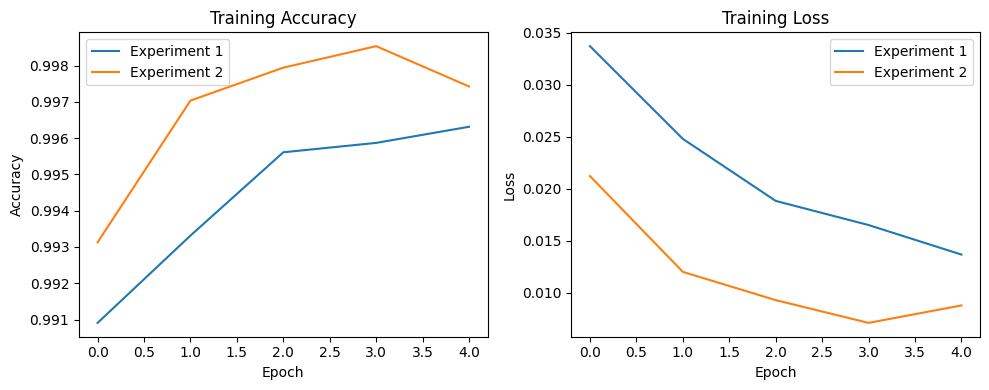

In [ ]:
import matplotlib.pyplot as plt

# 학습 정확도 비교
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train1.history['accuracy'], label='Experiment 1')
plt.plot(train2.history['accuracy'], label='Experiment 2')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 학습 손실 비교
plt.subplot(1, 2, 2)
plt.plot(train1.history['loss'], label='Experiment 1')
plt.plot(train2.history['loss'], label='Experiment 2')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **CIFAR-10 데이터셋**

#### 라이브러리 불러오기

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

#### CIFAR-10 데이터 이해

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


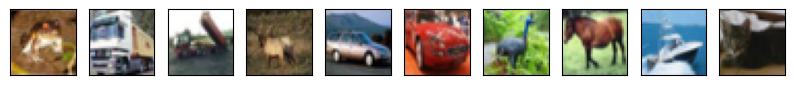

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
plt.figure(figsize=(10, 2))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show()

#### **CIFAR-10 표준화 + 이미지 분류**

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 표준화
mean = np.mean(x_train, axis=(0,1,2), keepdims=True)
std = np.std(x_train, axis=(0,1,2), keepdims=True)

x_train_std = (x_train - mean) / (std + 1e-7)
x_test_std = (x_test - mean) / (std + 1e-7)

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(32*32*3,)),layers.Dense(10, activation='softmax') # 10개의 클래스
    ])
model.compile(optimizer='adam', # 가중치 업데이트
              loss='sparse_categorical_crossentropy', # 로스 계산
              metrics=['accuracy']) # 모니터링 지표

cifar_train1 = model.fit(x_train_std.reshape(-1, 32*32*3), y_train, epochs=5, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3333 - loss: 2.3588 - val_accuracy: 0.4412 - val_loss: 1.6727
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4658 - loss: 1.5628 - val_accuracy: 0.4532 - val_loss: 1.5666
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4958 - loss: 1.4602 - val_accuracy: 0.4656 - val_loss: 1.5581
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5148 - loss: 1.4031 - val_accuracy: 0.4670 - val_loss: 1.5680
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5322 - loss: 1.3548 - val_accuracy: 0.4736 - val_loss: 1.5764


#### **CIFAR-10 배경 제거**

In [ ]:
def remove_background(images):
  processed = []
  for img in images:
    # Grayscale 변환
    img = np.uint8(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Edge 검출
    edges = cv2.Canny(gray, 50, 150)
    # Dilation으로 테두리 확장
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.dilate(edges, kernel, iterations=1)
    # 배경 제거: 배경은 0으로 마스킹
    mask_inv = cv2.bitwise_not(mask)
    img_masked = cv2.bitwise_and(img, img, mask=mask_inv)
    processed.append(img_masked)
  return np.array(processed)

# 표준화 + 배경제거
x_train_bg = remove_background(x_train_std)
x_test_bg = remove_background(x_test_std)

cifar_train2 = model.fit(x_train_bg.reshape(-1, 32*32*3), y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1072 - loss: 2.3294 - val_accuracy: 0.1126 - val_loss: 2.3485
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1137 - loss: 2.2696 - val_accuracy: 0.1128 - val_loss: 2.3544
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1161 - loss: 2.2614 - val_accuracy: 0.1130 - val_loss: 2.3745
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1180 - loss: 2.2574 - val_accuracy: 0.1136 - val_loss: 2.3771
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1183 - loss: 2.2552 - val_accuracy: 0.1134 - val_loss: 2.3911


#### **CIFAR-10 그레이스케일 변환**

In [ ]:
# 색깔에 대한 정보보다 엣지 부분의 흑백으로 변환해서 컴퓨터 리소스에 맞게 변환 (컴퓨터 사양이 안좋을때)
# 색 정보 없지만, 목적에 맞는 정보로 하는 경우
def to_grayscale(images):
  images = np.float32(images)
  gray_imgs = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in images]
  return np.expand_dims(np.array(gray_imgs), axis=-1) # (H, W, 1)


# 표준화 + 배경제거 _ 그레이스케일 변화
x_train_final = to_grayscale(x_train_bg)
x_test_final = to_grayscale(x_test_bg)

model2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(32*32,)),layers.Dense(10, activation='softmax') # 10개의 클래스
    ])
model2.compile(optimizer='adam', # 가중치 업데이트
              loss='sparse_categorical_crossentropy', # 로스 계산
              metrics=['accuracy']) # 모니터링 지표

cifar_train3 = model2.fit(x_train_final.reshape(-1, 32*32), y_train, epochs=5, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1239 - loss: 12.5574 - val_accuracy: 0.1296 - val_loss: 2.4426
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1703 - loss: 2.2644 - val_accuracy: 0.1352 - val_loss: 2.4625
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2152 - loss: 2.0953 - val_accuracy: 0.1400 - val_loss: 2.5492
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2441 - loss: 2.0385 - val_accuracy: 0.1500 - val_loss: 2.6218
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2695 - loss: 1.9899 - val_accuracy: 0.1508 - val_loss: 2.6906


#### **모델 3개의 학습 결과 비교 (시각화)**


cifar_train1: 표준화

cifar_train2: 표준화 + 배경제거

cifar_train3: 표준화 + 배경제거 + 그레이스케일 변화



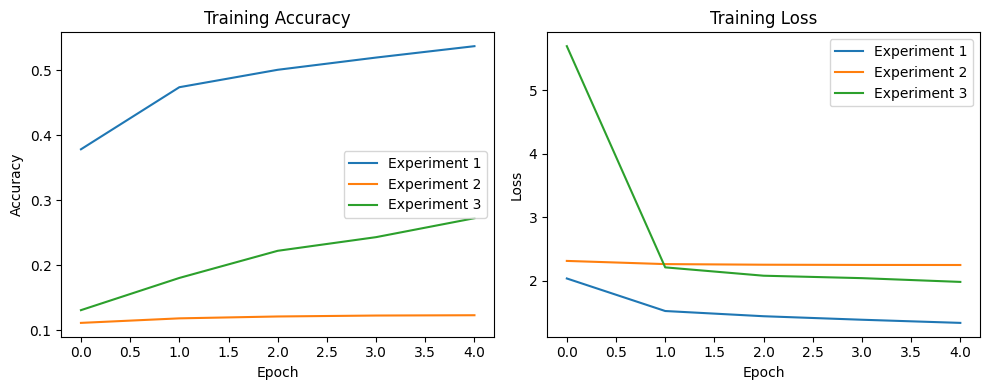

In [ ]:
import matplotlib.pyplot as plt

# 학습 정확도 비교
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cifar_train1.history['accuracy'], label='Experiment 1')
plt.plot(cifar_train2.history['accuracy'], label='Experiment 2')
plt.plot(cifar_train3.history['accuracy'], label='Experiment 3')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 학습 손실 비교
plt.subplot(1, 2, 2)
plt.plot(cifar_train1.history['loss'], label='Experiment 1')
plt.plot(cifar_train2.history['loss'], label='Experiment 2')
plt.plot(cifar_train3.history['loss'], label='Experiment 3')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()